# Gala

In [904]:
# Import Library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import random
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# Load Data
dataset = pd.read_csv("../Apple462.csv")
dataset

# Split data from region and drop the unused data
netherlands_dataset = dataset[dataset['region'] == 'Netherland']
netherlands_dataset.drop(['Unnamed: 0', 'Envi', 'Fuji'], axis=1, inplace=True)


netherlands_dataset # Show dataframe

C:\Users\maiwi\AppData\Local\Temp\ipykernel_23076\672829825.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netherlands_dataset.drop(['Unnamed: 0', 'Envi', 'Fuji'], axis=1, inplace=True)


,Date,Gala,region
884,27/12/2015,126151.0,Netherland
885,20/12/2015,127372.0,Netherland
886,13/12/2015,81450.0,Netherland
887,6/12/2015,7041.0,Netherland
888,29/11/2015,4335.0,Netherland
...,...,...,...
3508,4/2/2018,7990.0,Netherland
3509,28/1/2018,17666.0,Netherland
3510,21/1/2018,10598.0,Netherland
3511,14/1/2018,6066.0,Netherland


In [905]:
netherlands_dataset.count() # see df count to check misvalue

Date      169
Gala      168
region    169
dtype: int64

## Fill the average value to misvalue in dataframe

In [906]:
# average Gala
avg_Gala = math.ceil(netherlands_dataset['Gala'].sum() / len(netherlands_dataset['Gala']))

print(f"Average Gala: {avg_Gala}")

# add avg in miss value
netherlands_dataset['Gala'].fillna(avg_Gala, inplace=True)

netherlands_dataset.count()

Average Gala: 32268


C:\Users\maiwi\AppData\Local\Temp\ipykernel_23076\4148005068.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netherlands_dataset['Gala'].fillna(avg_Gala, inplace=True)


Date      169
Gala      169
region    169
dtype: int64

In [907]:
netherlands_dataset

,Date,Gala,region
884,27/12/2015,126151.0,Netherland
885,20/12/2015,127372.0,Netherland
886,13/12/2015,81450.0,Netherland
887,6/12/2015,7041.0,Netherland
888,29/11/2015,4335.0,Netherland
...,...,...,...
3508,4/2/2018,7990.0,Netherland
3509,28/1/2018,17666.0,Netherland
3510,21/1/2018,10598.0,Netherland
3511,14/1/2018,6066.0,Netherland


## Graph 

Show the graph after sorted by 'Date'

In [908]:
netherlands_dataset['Date'] = pd.to_datetime(netherlands_dataset['Date']) # transform date format d/m/y to y-m-d for using sort function
netherlands_dataset = netherlands_dataset.sort_values(by='Date') # sort by date

netherlands_dataset


C:\Users\maiwi\AppData\Local\Temp\ipykernel_23076\2499204772.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  netherlands_dataset['Date'] = pd.to_datetime(netherlands_dataset['Date']) # transform date format d/m/y to y-m-d for using sort function
C:\Users\maiwi\AppData\Local\Temp\ipykernel_23076\2499204772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netherlands_dataset['Date'] = pd.to_datetime(netherlands_dataset['Date']) # transform date format d/m/y to y-m-d for using sort function


,Date,Gala,region
935,2015-01-04,4379.0,Netherland
934,2015-01-11,4094.0,Netherland
933,2015-01-18,9354.0,Netherland
932,2015-01-25,4231.0,Netherland
931,2015-02-01,8063.0,Netherland
...,...,...,...
3505,2018-02-25,3976.0,Netherland
3504,2018-03-04,3827.0,Netherland
3503,2018-03-11,4184.0,Netherland
3502,2018-03-18,4011.0,Netherland


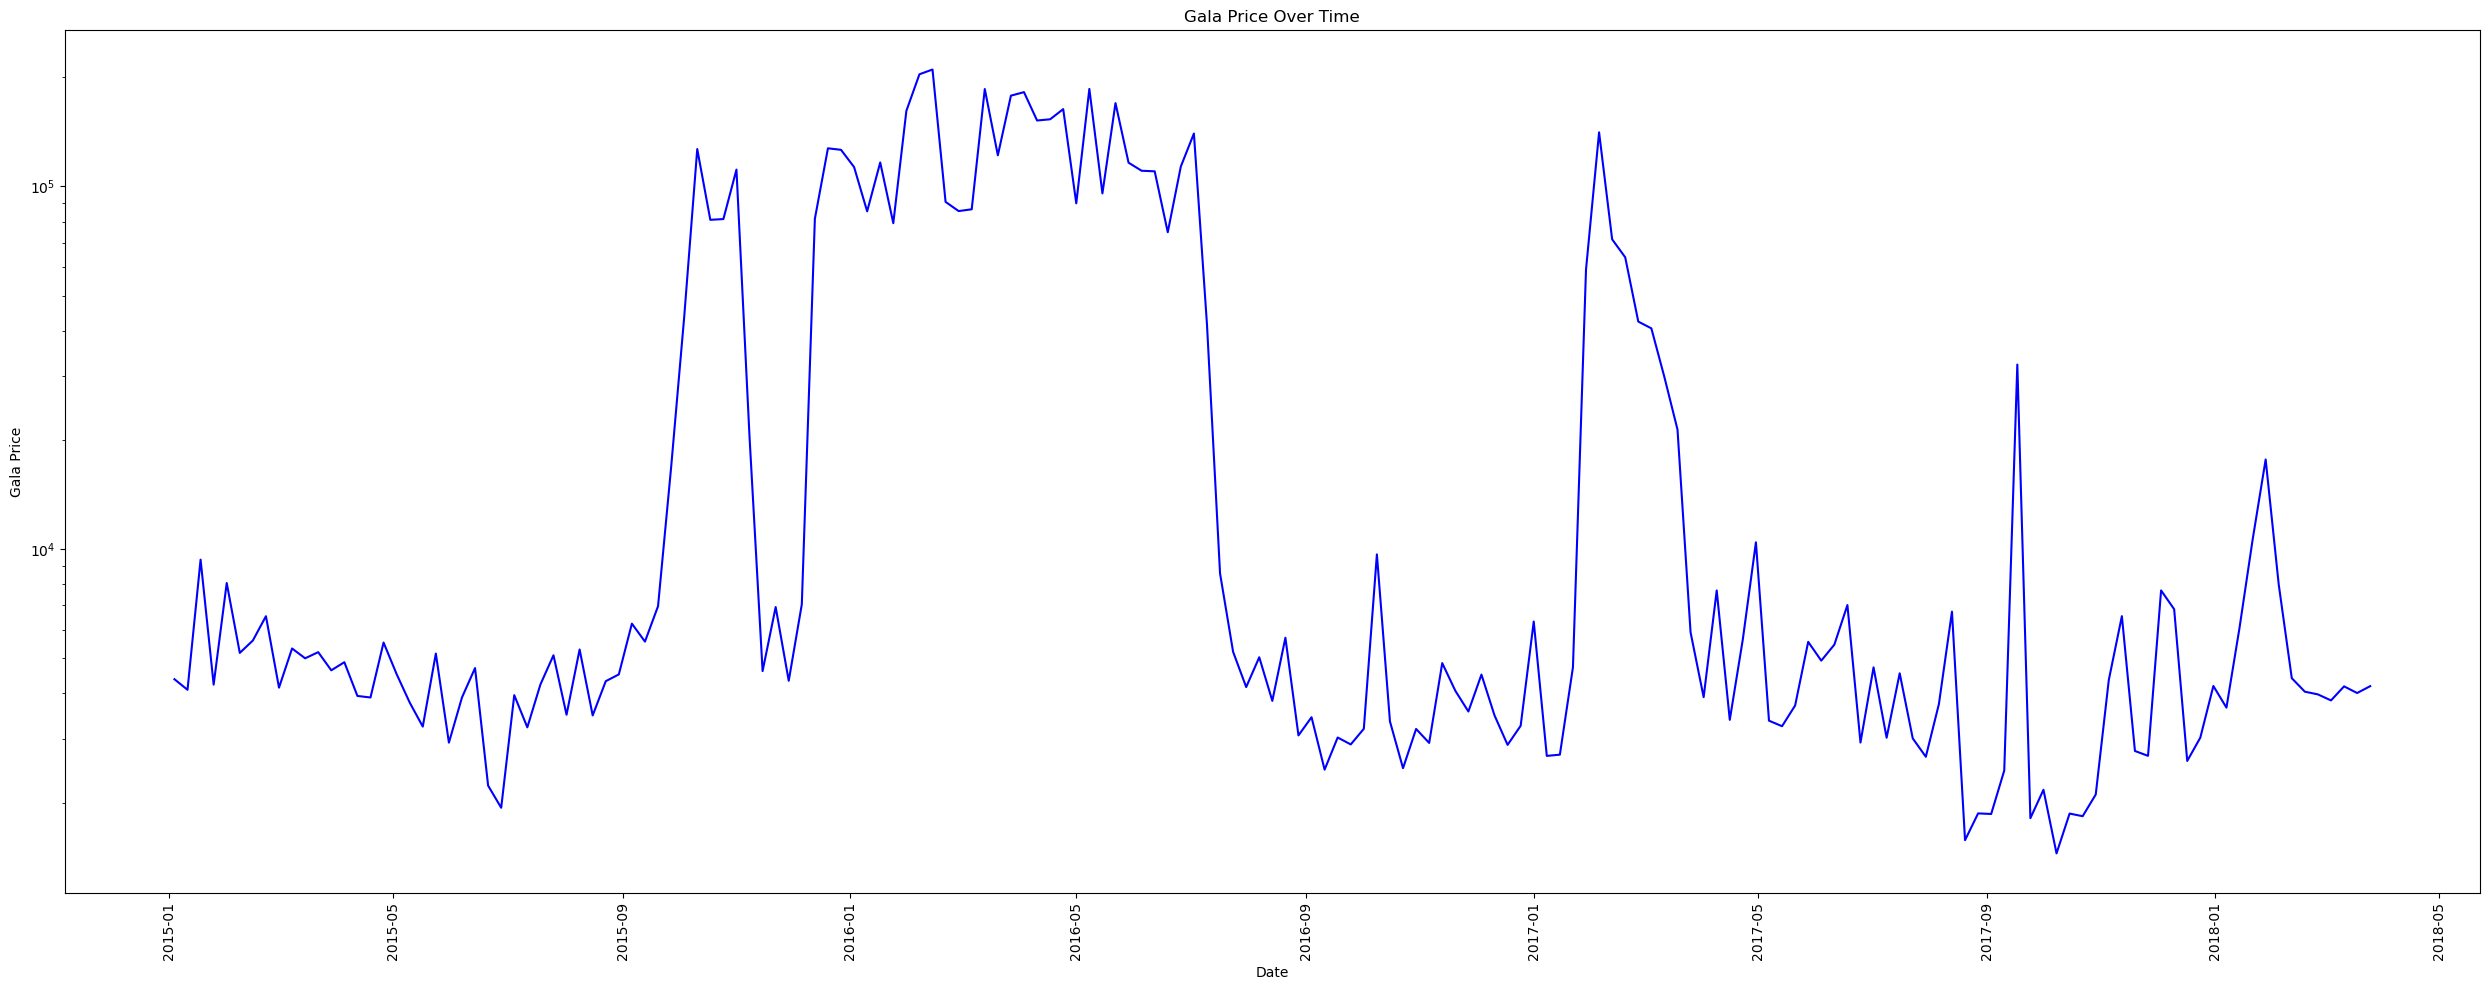

In [909]:
# graph size
plt.figure(figsize=(25, 10))
plt.plot(netherlands_dataset['Date'], netherlands_dataset['Gala'], color='b')

plt.xlabel('Date')

plt.ylabel('Gala Price')
plt.yscale('log') # set log scale

plt.title('Gala Price Over Time')
plt.xticks(rotation=90, fontsize=10) 
plt.tight_layout()

plt.show()

## Scale 

Use StandardScaler from sklearn to scale down the 'Gala' feature

In [910]:
# scale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(netherlands_dataset[['Gala']])
netherlands_dataset['Gala'] = scaled_data

netherlands_dataset

,Date,Gala,region
935,2015-01-04,-0.534529,Netherland
934,2015-01-11,-0.539955,Netherland
933,2015-01-18,-0.439823,Netherland
932,2015-01-25,-0.537347,Netherland
931,2015-02-01,-0.464399,Netherland
...,...,...,...
3505,2018-02-25,-0.542201,Netherland
3504,2018-03-04,-0.545037,Netherland
3503,2018-03-11,-0.538241,Netherland
3502,2018-03-18,-0.541535,Netherland


## Create new feature 

We make the function date_split to split 1 feature to get the 3 feature  
* year
* month
* day

and get_season function to make the season

In [911]:
# function สำหรับสร้าง feature เพิ่ม (year, month, day)

def date_split(data):
    data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
    data['year'] = data['Date'].dt.year
    data['month'] = data['Date'].dt.month   
    data['day'] = data['Date'].dt.day

date_split(netherlands_dataset)


def get_season(day, month):
    if (month == 3 and day >= 21) or month in range(4, 6) or (month == 6 and day < 21):
        return 'Spring'
    elif (month == 6 and day >= 21) or month in range(7, 9) or (month == 9 and day < 21):
        return 'Summer'
    elif (month == 9 and day >= 21) or month in range(10, 12) or (month == 12 and day < 21):
        return 'Autumn'
    else:
        return 'Winter'

netherlands_dataset['season'] = netherlands_dataset.apply(lambda x: get_season(x['day'], x['month']), axis=1)

season_mapping = {'Spring': 0, 'Summer': 1, 'Autumn': 2, 'Winter': 3}
netherlands_dataset['season'] = netherlands_dataset['season'].map(season_mapping)



df = netherlands_dataset.set_index('Date') # set 'Date' to id because it unique

### This is the df after prepare and it ready to train the model

In [912]:
df

,Gala,region,year,month,day,season
Date,,,,,,
2015-01-04,-0.534529,Netherland,2015,1,4,3
2015-01-11,-0.539955,Netherland,2015,1,11,3
2015-01-18,-0.439823,Netherland,2015,1,18,3
2015-01-25,-0.537347,Netherland,2015,1,25,3
2015-02-01,-0.464399,Netherland,2015,2,1,3
...,...,...,...,...,...,...
2018-02-25,-0.542201,Netherland,2018,2,25,3
2018-03-04,-0.545037,Netherland,2018,3,4,3
2018-03-11,-0.538241,Netherland,2018,3,11,3


## For case user time step 

The Gala_x1 gets the next label of the next sample, you can uncomment below if you want to test 

In [913]:
# df['Gala_x1'] = df['Gala'].shift(-1, fill_value=0)
# df['Gala_x2'] = df['Gala'].shift(-2, fill_value=0)
# df['Gala_x3'] = df['Gala'].shift(-3, fill_value=0)
# df['Gala_x4'] = df['Gala'].shift(-4, fill_value=0)
# df['Gala_x5'] = df['Gala'].shift(-5, fill_value=0)
# df['Gala_x6'] = df['Gala'].shift(-6, fill_value=0)
# df['Gala_x7'] = df['Gala'].shift(-7, fill_value=0)
# df['Gala_x8'] = df['Gala'].shift(-8, fill_value=0)

# df.drop(df.tail(8).index, inplace=True)

# df

## Set seed_value 

In [914]:
seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)

## Train and Test Model

In [915]:
# Algorithm
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

# Loss Function
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


df.drop(['region'], axis=1, inplace=True)

df['Date_ordinal'] = df.index.to_series().apply(lambda x: x.toordinal())

train, test = train_test_split(df, test_size=0.15)


X_train = train.drop(['Gala'], axis=1)
y_train = train['Gala']

X_test = test.drop(['Gala'], axis=1)
y_test = test['Gala']

# Test Algorithm 
dt_reg = DecisionTreeRegressor() # best
# dt_reg = LinearRegression()
# dt_reg = SVR()
# dt_reg = GradientBoostingRegressor() 
# dt_reg = MLPRegressor()
# dt_reg = RandomForestRegressor()

dt_reg.fit(X_train, y_train)


dt_pred = dt_reg.predict(X_test)

test['Gala_Predicted'] = dt_pred

# Show performance
MSE = mean_squared_error(y_test, dt_pred)
print(f'Mean Squared Error: {MSE}')

MAE = mean_absolute_error(y_test, dt_pred)
print(f'Mean Absolute Error: {MAE}')

R2 = r2_score(y_test, dt_pred)
print(f'R2 Score: {MAE}')


Mean Squared Error: 0.12776517833951778
Mean Absolute Error: 0.16183472146763822
R2 Score: 0.16183472146763822


In [916]:
test

,Gala,year,month,day,season,Date_ordinal,Gala_Predicted
Date,,,,,,,
2017-08-27,-0.582330,2017,8,27,1,736568,-0.587888
2015-08-02,-0.551357,2015,8,2,1,735812,-0.542563
2017-04-16,-0.553489,2017,4,16,0,736435,-0.471481
2015-07-26,-0.520861,2015,7,26,1,735805,-0.581035
2017-10-01,-0.576581,2017,10,1,2,736603,-0.534910
2018-02-11,-0.533996,2018,2,11,3,736736,-0.465789
2018-03-04,-0.545037,2018,3,4,3,736757,-0.538241
2015-12-27,1.783567,2015,12,27,3,735959,1.806810
2017-01-08,-0.566663,2017,1,8,3,736337,-0.497694


## Graph after training

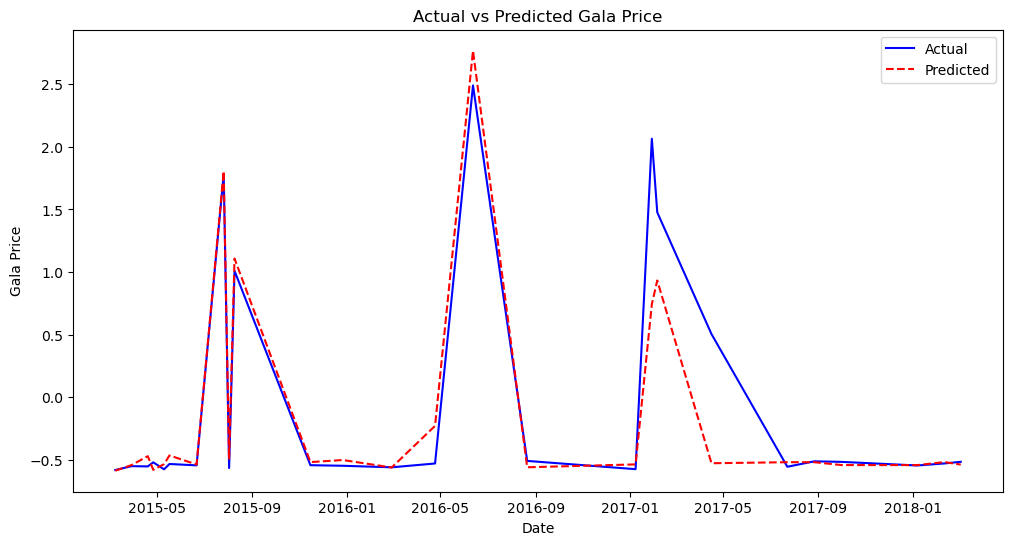

In [917]:
test = test.sort_values(by='Date')

plt.figure(figsize=(12, 6))
plt.plot(test.index, y_test, label='Actual', color='blue')
plt.plot(test.index, dt_pred, label='Predicted', color='red', linestyle='--')
plt.xlabel('Date')
# plt.yscale('log')
plt.ylabel('Gala Price')
plt.title('Actual vs Predicted Gala Price')
plt.legend()
plt.show()


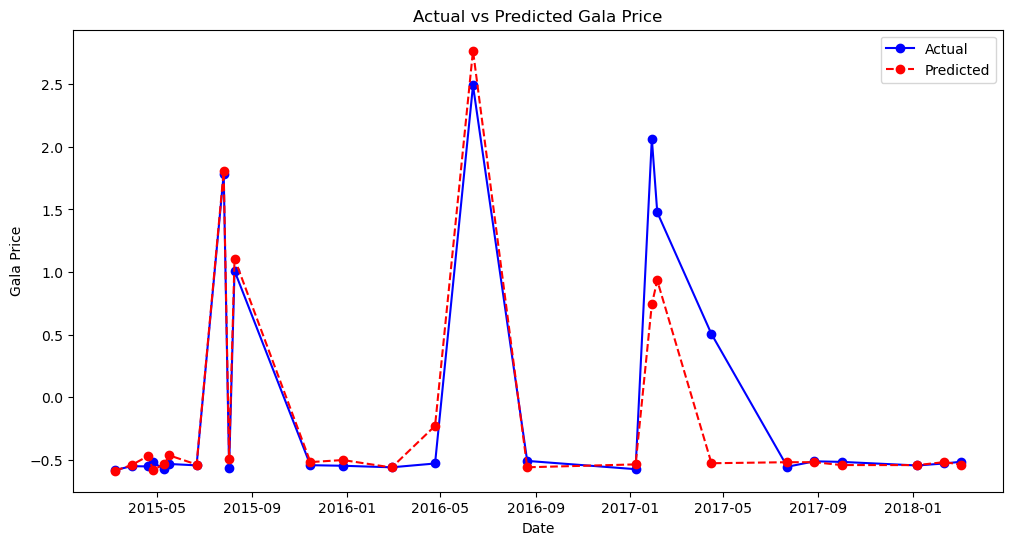

In [918]:
plt.figure(figsize=(12, 6))
plt.plot(test.index, y_test, label='Actual', color='blue', marker='o')
plt.plot(test.index, dt_pred, label='Predicted', color='red', linestyle='--', marker='o')
plt.xlabel('Date')
plt.ylabel('Gala Price')
plt.title('Actual vs Predicted Gala Price')
plt.legend()
plt.show()


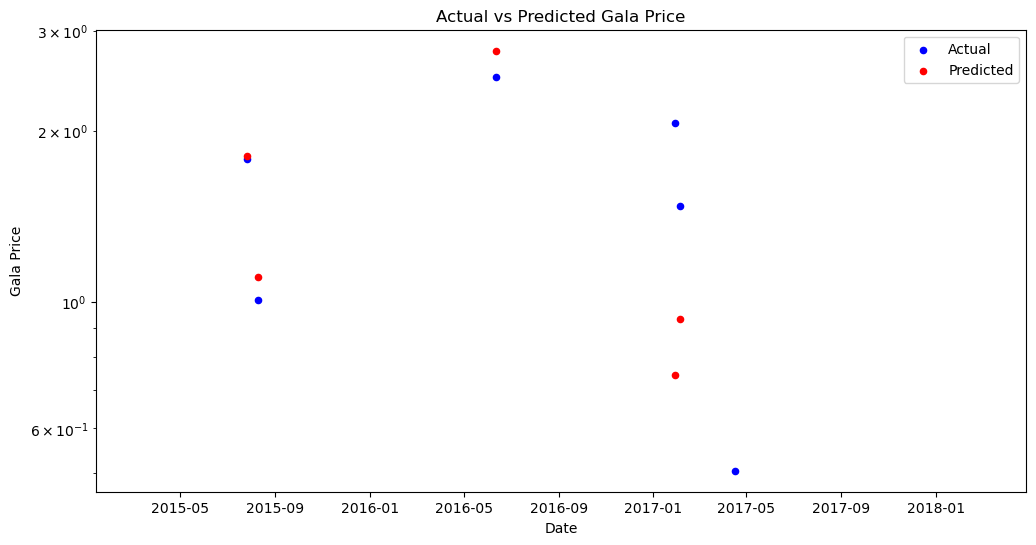

In [919]:
plt.figure(figsize=(12, 6))
plt.scatter(test.index, y_test, label='Actual', color='blue', s=20) 
plt.scatter(test.index, dt_pred, label='Predicted', color='red', s=20)  
plt.xlabel('Date')
plt.ylabel('Gala Price')
plt.yscale('log')
plt.title('Actual vs Predicted Gala Price')
plt.legend()
plt.show()


In [920]:
feature_importance = dt_reg.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]
for idx in sorted_idx:
    print(f'Feature: {X_train.columns[idx]}, Importance: {feature_importance[idx]}')


Feature: Date_ordinal, Importance: 0.9208196316291614
Feature: day, Importance: 0.04548419975737592
Feature: month, Importance: 0.0281586971796
Feature: season, Importance: 0.005297560545684929
Feature: year, Importance: 0.0002399108881778166


In [921]:
# final_df = test
# final_df.drop(['year', 'month', 'day', 'season'], axis=1, inplace=True)
# final_df

In [922]:
# final_df = test
# final_df.drop(['year', 'month', 'day', 'season', 'Gala_x1', 'Gala_x2', 'Gala_x3', 'Gala_x4', 'Gala_x5', 'Gala_x6', 'Gala_x7', 'Gala_x8'], axis=1, inplace=True)
# final_df

In [923]:
# df_pred = dt_reg.predict(df.drop(['Gala'], axis=1))
# df['Gala_pred'] = df_pred
# df.drop(['year', 'month', 'day', 'season', 'Date_ordinal'], axis=1, inplace=True)
# df